In [1]:
install.packages('lme4')


The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpTADv0T/downloaded_packages


In [2]:
library(lme4)

Loading required package: Matrix



In [5]:
vf = read.csv('final_dataset.csv')

In [6]:
head(vf)

,Session,Date,Treatment,Protocol,Stage,Trial,ID,Latency,Reason,Scoring,Force,Inconsistent,Response,SurgeryDate,DayNumber
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
1,3137,2025-07-02 09:19:54,CCD,AMN,PRE,C,DW368,1.8,Detection,Auto,19.20,False,1,2025-07-02 09:19:54,0
2,3138,2025-07-02 09:20:12,CCD,AMN,PRE,C,DW368,5.1,Detection,Auto,51.04,False,1,2025-07-02 09:19:54,0
3,3139,2025-07-02 09:20:29,CCD,AMN,PRE,C,DW368,6.2,Detection,Auto,60.00,False,1,2025-07-02 09:19:54,0
4,3140,2025-07-02 09:20:39,CCD,AMN,PRE,C,DW368,0.0,Manual Stop,Auto,0.30,False,0,2025-07-02 09:19:54,0
5,3141,2025-07-02 09:20:47,CCD,AMN,PRE,C,DW368,5.3,Detection,Auto,54.03,False,1,2025-07-02 09:19:54,0
6,3142,2025-07-02 09:20:59,CCD,AMN,PRE,C,DW368,5.5,Detection,Auto,55.36,False,1,2025-07-02 09:19:54,0


In [7]:
vf_i = subset(vf, Trial =='I')

In [10]:
model = lmer(Force ~ DayNumber * Stage + (1|ID), data = vf_i)
summary(model)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient



Linear mixed model fit by REML ['lmerMod']
Formula: Force ~ DayNumber * Stage + (1 | ID)
   Data: vf_i

REML criterion at convergence: 4046.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2045 -0.6665 -0.1650  0.4846  3.9022 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  16.59    4.073  
 Residual             149.36   12.221  
Number of obs: 516, groups:  ID, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)  14.9533     3.1775   4.706
DayNumber     0.1882     0.1062   1.772
StagePRE      9.4581     2.3778   3.978

Correlation of Fixed Effects:
          (Intr) DyNmbr
DayNumber -0.384       
StagePRE  -0.239  0.512
fit warnings:
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

In [11]:
model = lmer(Force ~ DayNumber + (1|ID), data = vf_i)
summary(model)

Linear mixed model fit by REML ['lmerMod']
Formula: Force ~ DayNumber + (1 | ID)
   Data: vf_i

REML criterion at convergence: 4066

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6658 -0.6745 -0.1754  0.4944  3.6602 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  18.29    4.277  
 Residual             153.64   12.395  
Number of obs: 516, groups:  ID, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept) 17.97259    3.22556   5.572
DayNumber   -0.02821    0.09253  -0.305

Correlation of Fixed Effects:
          (Intr)
DayNumber -0.304

In [12]:
library(ggplot2)

ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


In [13]:
install.packages('ggplot2')

also installing the dependencies ‘farver’, ‘labeling’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘magrittr’, ‘pkgconfig’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘withr’





The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpTADv0T/downloaded_packages


In [14]:
library(ggplot2)

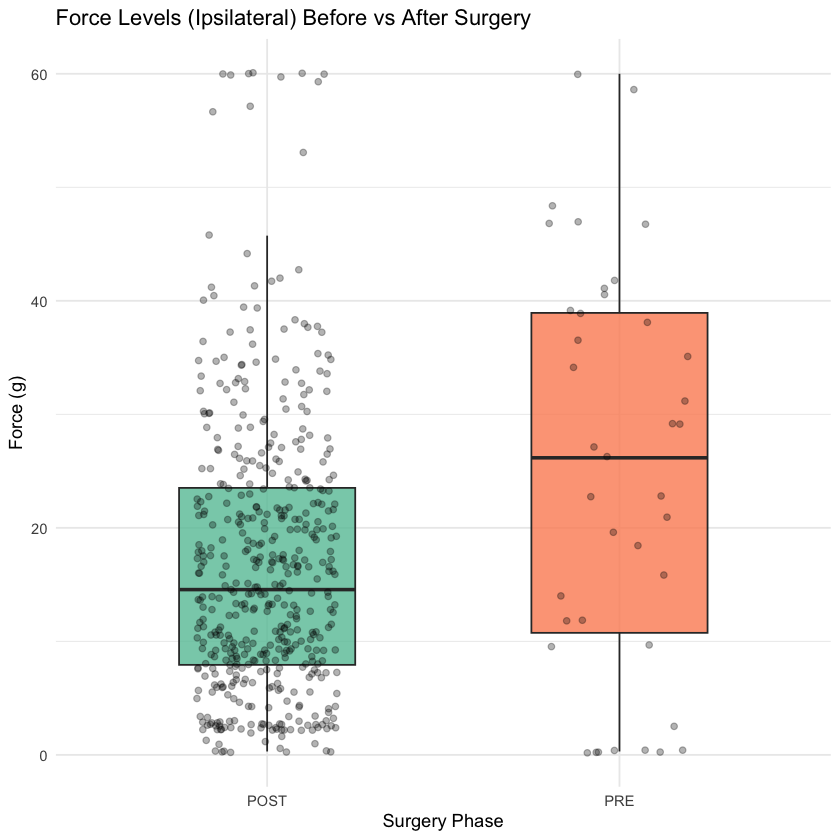

In [23]:
ggplot(vf_i, aes(x = Stage, y = Force, fill = Stage)) +
  geom_boxplot(width = 0.5, alpha = 0.8, outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.3, color = "black") +
  labs(
    title = "Force Levels (Ipsilateral) Before vs After Surgery",
    x = "Surgery Phase",
    y = "Force (g)"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2") +
  theme(legend.position = "none")

In [16]:
install.packages('dplyr')

also installing the dependencies ‘generics’, ‘tidyselect’





The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpTADv0T/downloaded_packages


In [17]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:ggplot2’:

    vars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
rat_summary <- vf_i %>%
  group_by(ID, DayNumber) %>%
  summarise(MedianForce = median(Force, na.rm = TRUE))

`summarise()` has grouped output by 'ID'. You can override using the `.groups`
argument.


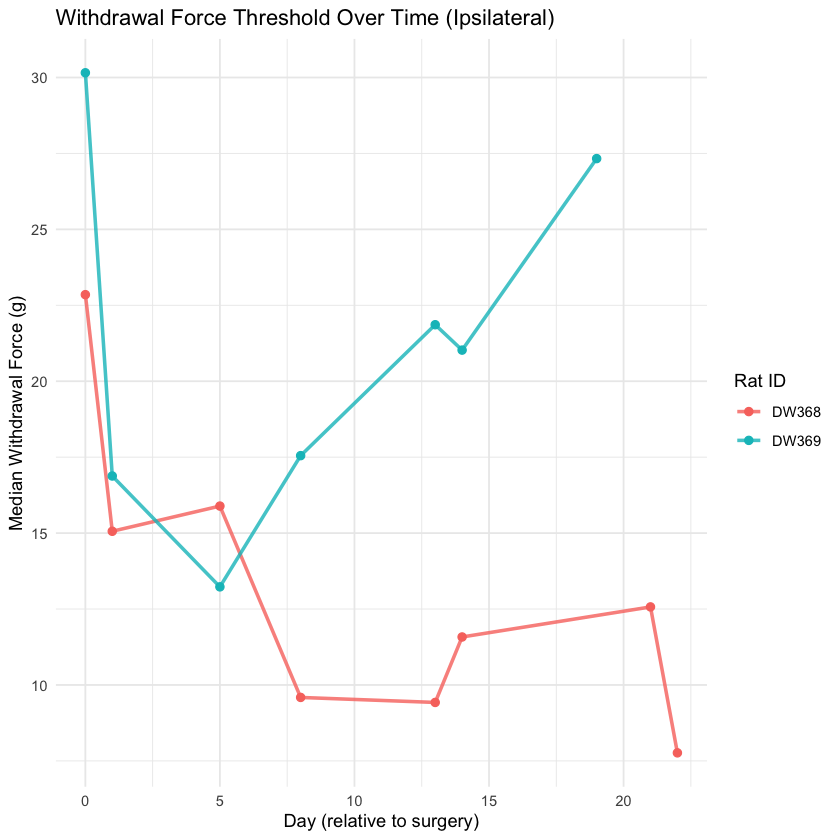

In [21]:
ggplot(data = rat_summary, 
       mapping = aes(x = DayNumber, y = MedianForce, color = ID)) + 
geom_line(linewidth = 1, alpha = 0.8)+ 
geom_point(size = 2) + 
labs(
    title = 'Withdrawal Force Threshold Over Time (Ipsilateral)', 
    x = 'Day (relative to surgery)',
    y = 'Median Withdrawal Force (g)',
    color = 'Rat ID'
    ) + 
theme_minimal()